Instructions for how to fix the initial conditions files (temperature and salinity) for the child model.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from salishsea_tools.nc_tools import scDataset


%matplotlib inline

In [2]:
child = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/real_base/1_real_bathy_for_agrif_fix.nc')['Bathymetry'][:]
parent_orig = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/bathymetry/NEMO_files/realistic/real_bathy_for_agrif.nc')['Bathymetry'][:]
parent_fix = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/prepare_real_bathy/real_bathy_for_agrif_fix.nc')['Bathymetry'][:]
elevation = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/prepare_real_bathy/IBCAO_V3_500m_RR_For_Nesting_Tools.nc')['Bathymetry'][:]

In [3]:
child.shape

(274, 184)

    ==>> time-step=            1  abs(U) max:   1.400076883992015E+065

    ===>>> : E R R O R
     ===========

    stpctl: the zonal velocity is larger than 20 m/s
    ======
    kt=     1 max abs(U):  1.4001E+65, i j k:   182  241   49

       output of last fields in numwso
    ==>> time-step=            1  SSS min:   22.1943175862609

    ===>>> : E R R O R
     ===========

    step: indic < 0

    dia_wri_state : single instantaneous ocean state
    ~~~~~~~~~~~~~   and forcing fields file created
             and named :1_output.abort                  .nc

# Parent bathymetry at the start: real_bathy_for_agrif

(10, 100)

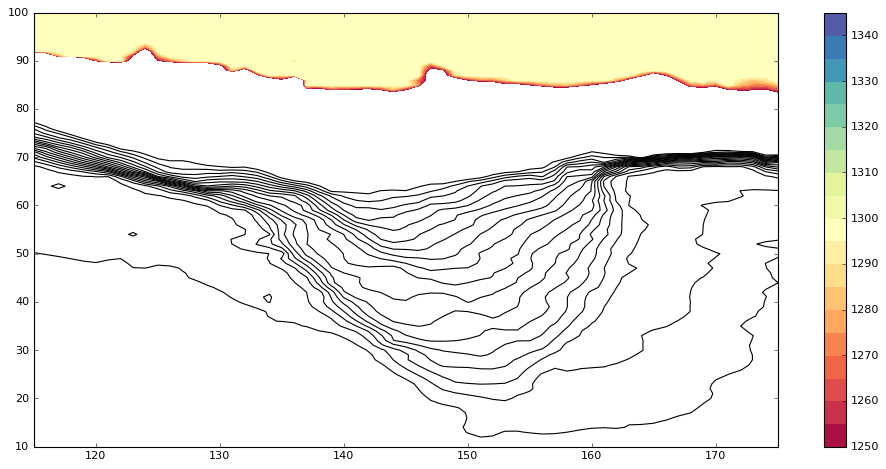

In [4]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(parent_orig, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(parent_orig, levels = np.arange(40, 400, 20), colors='k')
fig.colorbar(p, ax=ax)
ax.set_xlim([115, 175])
ax.set_ylim([10, 100])

# Parent bathymetry after it's fixed: real_bathy_for_agrif_fix

(10, 100)

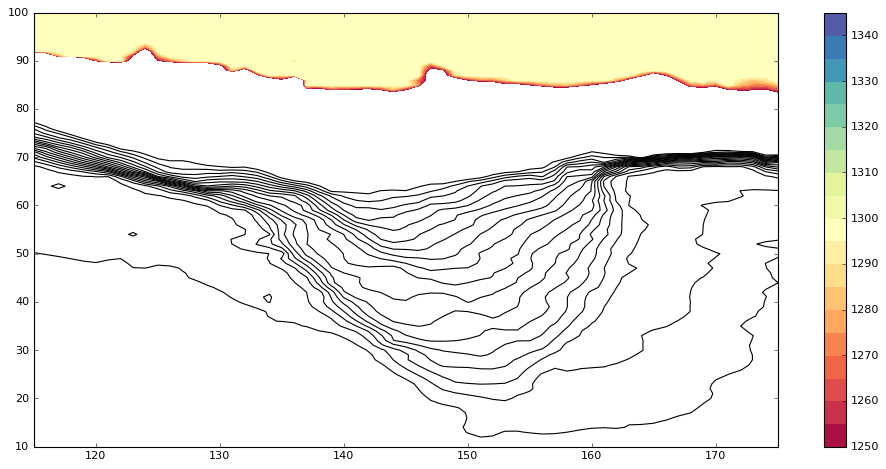

In [5]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(parent_fix, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(parent_fix, levels = np.arange(40, 400, 20), colors='k')
fig.colorbar(p, ax=ax)
ax.set_xlim([115, 175])
ax.set_ylim([10, 100])

# Elevation database used as reference for child interpolation: IBCAO_V3_500m_RR_For_Nesting_Tools

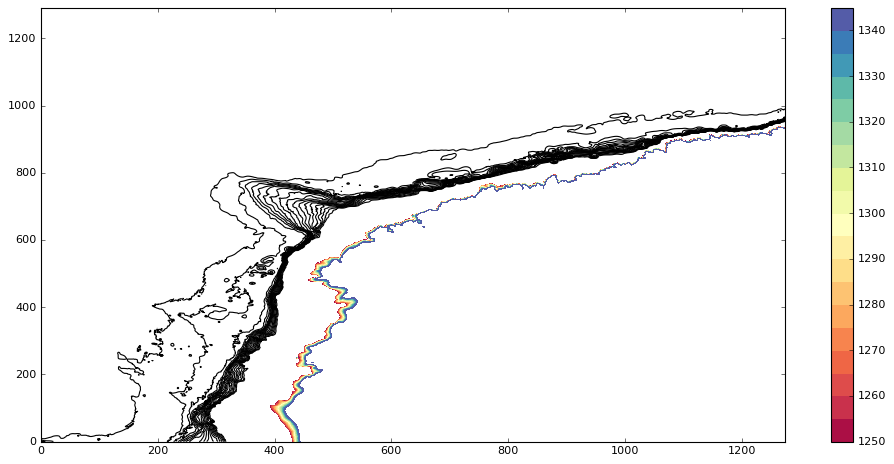

In [6]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(elevation, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(elevation, levels = np.arange(40, 400, 20), colors='k')
fig.colorbar(p, ax=ax)

# Child bathymetry from parent and elevation database: 1_real_bathy_for_agrif_fix

(0, 274)

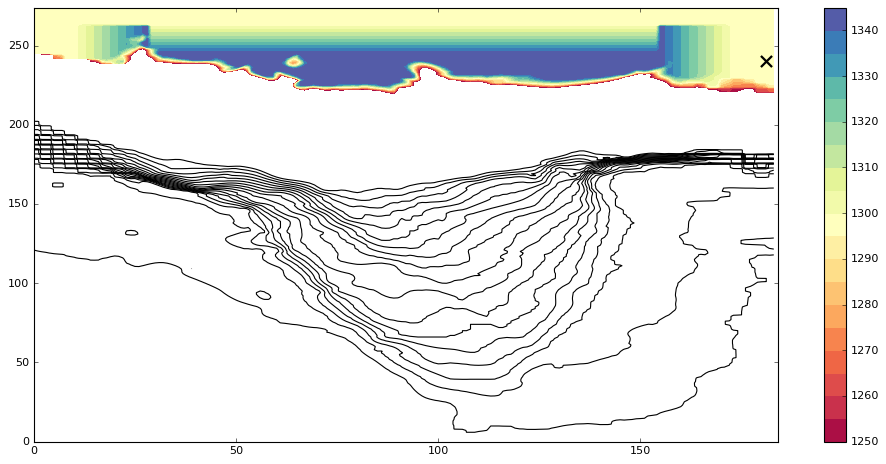

In [7]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(child, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(child, levels = np.arange(40, 400, 20), colors='k')
ax.scatter(181, 240, s=100, c='k', marker='x', linewidth=2)
fig.colorbar(p, ax=ax)
ax.set_xlim([0, child.shape[-1]])
ax.set_ylim([0, child.shape[-2]])

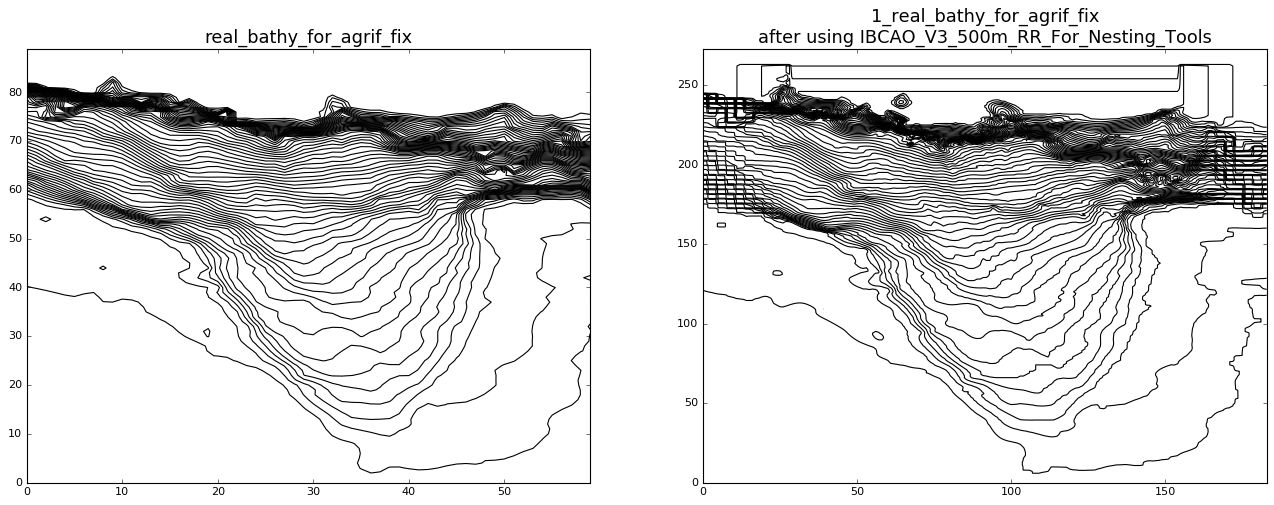

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 7))
levels = np.arange(40, 1350, 20)
ax1.contour(parent_fix[10:100, 115:175], levels=levels, colors='k')
ax2.contour(child, levels=levels, colors='k')
ax1.set_title('real_bathy_for_agrif_fix', fontsize=16)
ax2.set_title('1_real_bathy_for_agrif_fix\nafter using IBCAO_V3_500m_RR_For_Nesting_Tools', fontsize=16)

# How would 1_real_bathy_for_agrif_fix if we didn't use an elevation database?

    <                 8  ocean grid points suppressed
    ---
    >                 7  ocean grid points suppressed
    1530c1530
    <   ==>> time-step=            1  abs(U) max:   1.400076883992016E+065
    ---
    >   ==>> time-step=            1  abs(U) max:   1.400076883992015E+065
    1537c1537
    <  kt=     1 max abs(U):  1.4001E+65, i j k:   182  241   43
    ---
    >  kt=     1 max abs(U):  1.4001E+65, i j k:   182  241   49

# Checking initial conditions

In [9]:
temp = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/real_base/1_temperature_for_agrif.nc')['votemper'][:]
salt = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/real_base/1_salinity_for_agrif.nc')['vosaline'][:]

In [10]:
temp.shape

(1, 80, 274, 184)

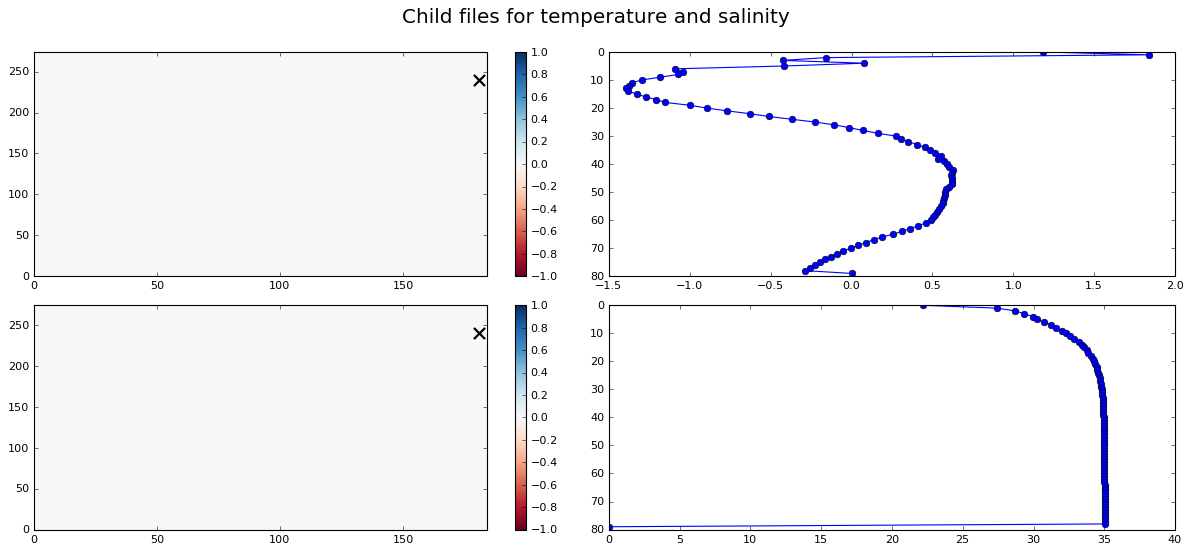

In [11]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize=(15, 7))
fig.suptitle('Child files for temperature and salinity', fontsize=18)
for var, axa, axb, n in zip([temp, salt], [ax1, ax3], [ax2, ax4], np.arange(2)):
    plot_var = var[0, -1, ...]
    p = axa.pcolormesh(plot_var, cmap=cm.RdBu, vmin=-1.0, vmax=1.0)
    axa.scatter(181, 240, s=100, c='k', marker='x', linewidth=2)
    fig.colorbar(p, ax=axa)
    axa.set_xlim([0, plot_var.shape[-1]])
    axa.set_ylim([0, plot_var.shape[-2]])
    axb.plot(var[0, :, 240, 181], np.arange(80), marker='o')
    axb.invert_yaxis()
fig.tight_layout()
plt.subplots_adjust(top=0.9)

In [12]:
temp0 = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/temperature/temperature_for_agrif.nc')['votemper'][:]
salt0 = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/salinity/salinity_for_agrif.nc')['vosaline'][:]

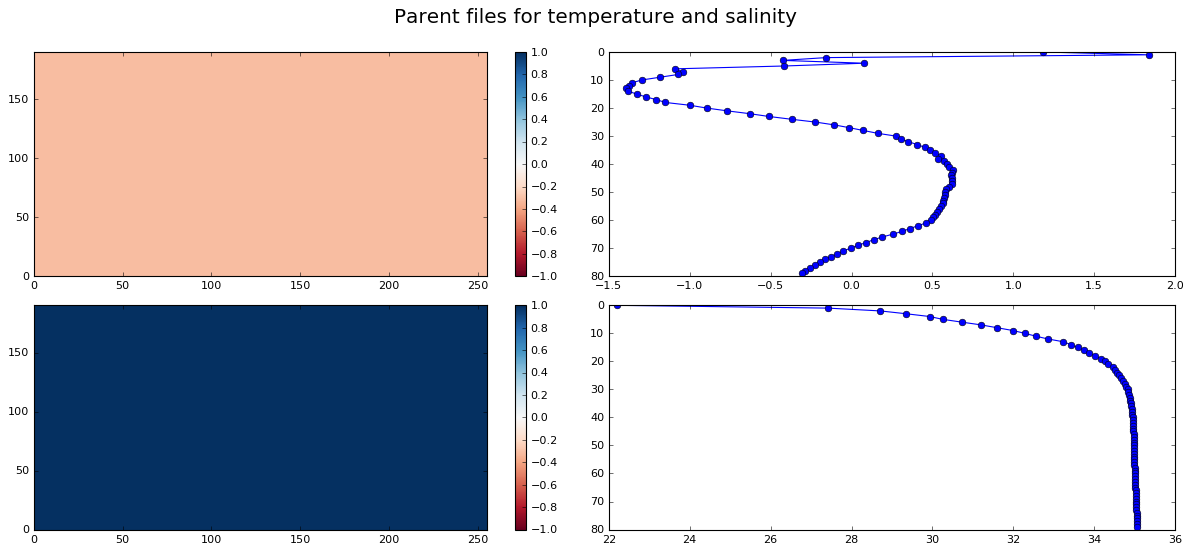

In [13]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize=(15, 7))
fig.suptitle('Parent files for temperature and salinity', fontsize=18)
for var, axa, axb, n in zip([temp0, salt0], [ax1, ax3], [ax2, ax4], np.arange(2)):
    plot_var = var[0, -1, ...]
    p = axa.pcolormesh(plot_var, cmap=cm.RdBu, vmin=-1.0, vmax=1.0)
    fig.colorbar(p, ax=axa)
    axb.plot(var[0, :, 100, 175], np.arange(80), marker='o')
    axb.invert_yaxis()
    axa.set_xlim([0, plot_var.shape[-1]])
    axa.set_ylim([0, plot_var.shape[-2]])
fig.tight_layout()
plt.subplots_adjust(top=0.9)

# Script that replaces the zero with the value just above it

# It works in halibut (not orcinus)

In [16]:
temp_test = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/real_base/1_temperature_for_agrif_test.nc')['votemper'][:]
salt_test = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/real_base/1_salinity_for_agrif_test.nc')['vosaline'][:]

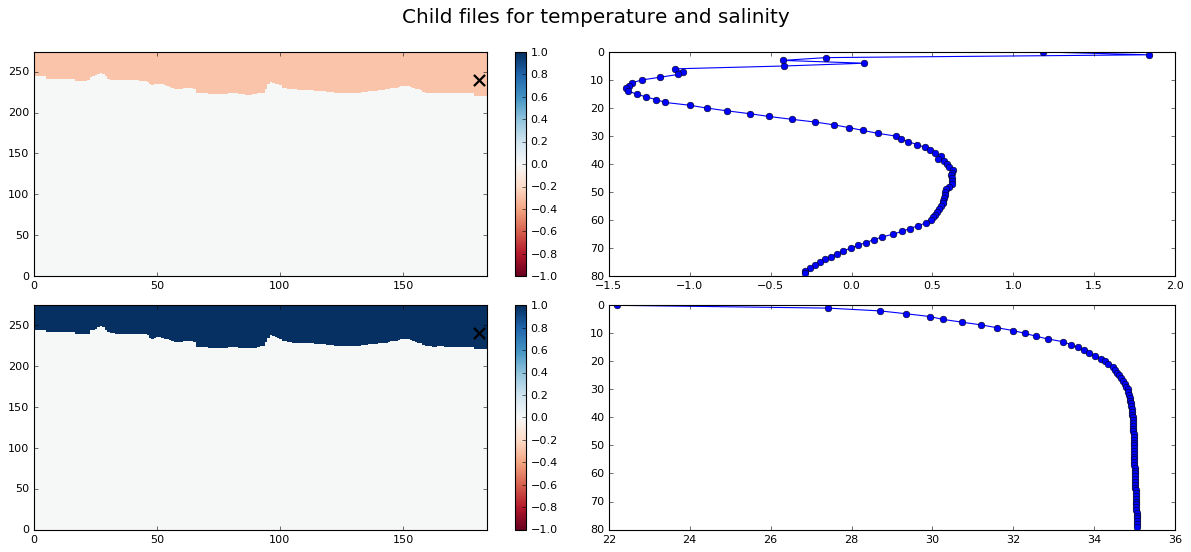

In [17]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize=(15, 7))
fig.suptitle('Child files for temperature and salinity', fontsize=18)
for var, axa, axb, n in zip([temp_test, salt_test], [ax1, ax3], [ax2, ax4], np.arange(2)):
    plot_var = var[0, -1, ...]
    p = axa.pcolormesh(plot_var, cmap=cm.RdBu, vmin=-1.0, vmax=1.0)
    axa.scatter(181, 240, s=100, c='k', marker='x', linewidth=2)
    fig.colorbar(p, ax=axa)
    axa.set_xlim([0, plot_var.shape[-1]])
    axa.set_ylim([0, plot_var.shape[-2]])
    axb.plot(var[0, :, 240, 181], np.arange(80), marker='o')
    axb.invert_yaxis()
fig.tight_layout()
plt.subplots_adjust(top=0.9)

This notebook does not need to be used. But, since the script doesn't work in Orcinus, we have to do this:

1. Produce 1_temperature_for_agrif.nc and 1_salinity_for_agrif.nc using run.sh in orcinus.
2. scp both files into halibut, for example into /runs_mackenzie_canyon/runs/real_base
3. python fix_initial_conditions
4. scp both files (now fixed) back into the orcinus.

# Verify the last file created (moved to orcinus)

In [2]:
temp = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/real_base/1_temperature_for_agrif.nc')['votemper'][:]
salt = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/real_base/1_salinity_for_agrif.nc')['vosaline'][:]

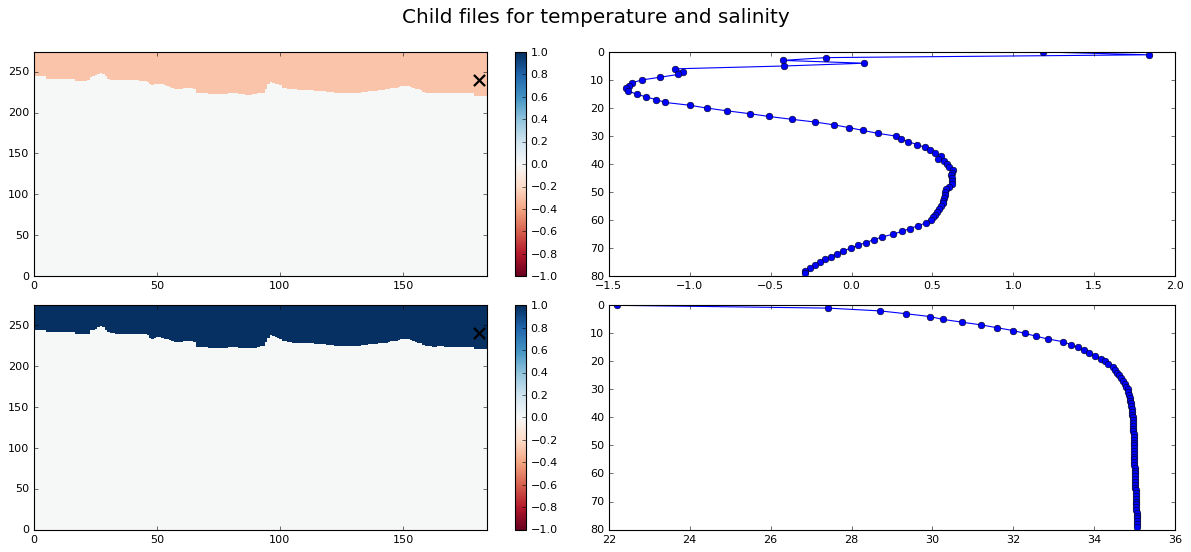

In [3]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize=(15, 7))
fig.suptitle('Child files for temperature and salinity', fontsize=18)
for var, axa, axb, n in zip([temp, salt], [ax1, ax3], [ax2, ax4], np.arange(2)):
    plot_var = var[0, -1, ...]
    p = axa.pcolormesh(plot_var, cmap=cm.RdBu, vmin=-1.0, vmax=1.0)
    axa.scatter(181, 240, s=100, c='k', marker='x', linewidth=2)
    fig.colorbar(p, ax=axa)
    axa.set_xlim([0, plot_var.shape[-1]])
    axa.set_ylim([0, plot_var.shape[-2]])
    axb.plot(var[0, :, 240, 181], np.arange(80), marker='o')
    axb.invert_yaxis()
fig.tight_layout()
plt.subplots_adjust(top=0.9)

# Still unstable - looking at abort files

    ==>> time-step=            1  abs(U) max:   1.400076883992013E+065

     ===>>> : E R R O R
             ===========

      stpctl: the zonal velocity is larger than 20 m/s
      ====== 
     kt=     1 max abs(U):  1.4001E+65, i j k:   182  241   52

               output of last fields in numwso
      ==>> time-step=            1  SSS min:   22.1943175862609     

     ===>>> : E R R O R
             ===========

     step: indic < 0

     dia_wri_state : single instantaneous ocean state
     ~~~~~~~~~~~~~   and forcing fields file created 
                     and named :1_output.abort                  .nc
                     
                     
### 1_namelist_cfg

    >    jpidta      =     184                 !  1st lateral dimension ( >= jpi ) = 30*jp_cfg+2
    >    jpjdta      =     274                 !  2nd    "         "    ( >= jpj ) = 20*jp_cfg+2 
    
### mackenzie_real
    nb_connection_pts = 6
    
# Results in temporary directory

In [59]:
temp = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-18T234729.518753-0800/1_NEMO_files/1_temperature_for_agrif.nc')['votemper'][:]
salt = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-18T234729.518753-0800/1_NEMO_files/1_salinity_for_agrif.nc')['vosaline'][:]

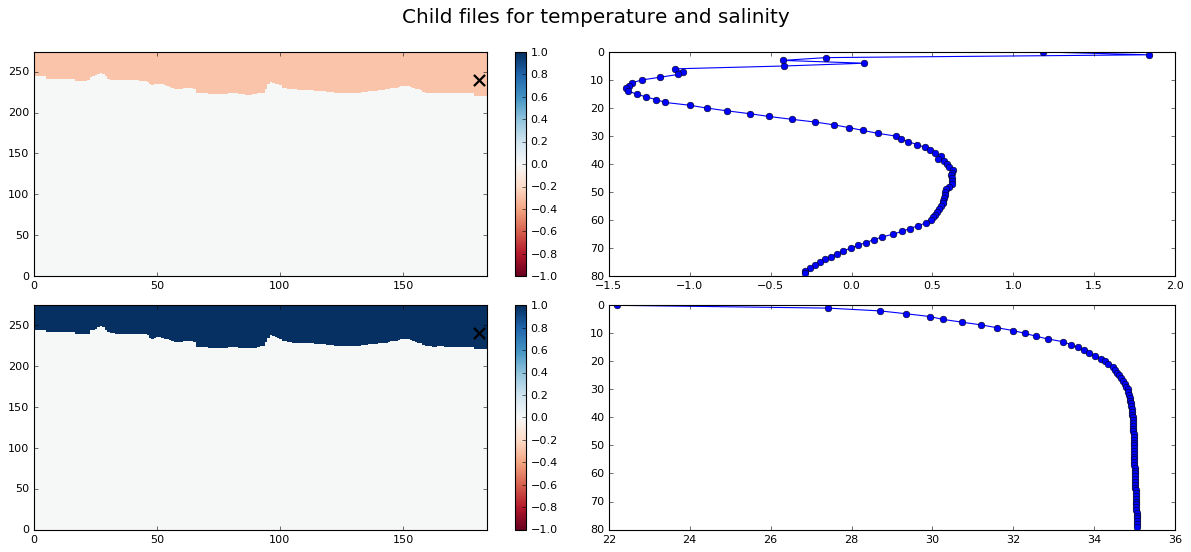

In [60]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize=(15, 7))
fig.suptitle('Child files for temperature and salinity', fontsize=18)
for var, axa, axb, n in zip([temp, salt], [ax1, ax3], [ax2, ax4], np.arange(2)):
    plot_var = var[0, -1, ...]
    p = axa.pcolormesh(plot_var, cmap=cm.RdBu, vmin=-1.0, vmax=1.0)
    axa.scatter(181, 240, s=100, c='k', marker='x', linewidth=2)
    fig.colorbar(p, ax=axa)
    axa.set_xlim([0, plot_var.shape[-1]])
    axa.set_ylim([0, plot_var.shape[-2]])
    axb.plot(var[0, :, 240, 181], np.arange(80), marker='o')
    axb.invert_yaxis()
fig.tight_layout()
plt.subplots_adjust(top=0.9)

In [62]:
abort = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-18T234729.518753-0800/1_output.abort.nc')

In [63]:
abort_u = abort['vozocrtx'][0, ...]
abort_t = abort['votemper'][0, ...]
abort_s = abort['vosaline'][0, ...]

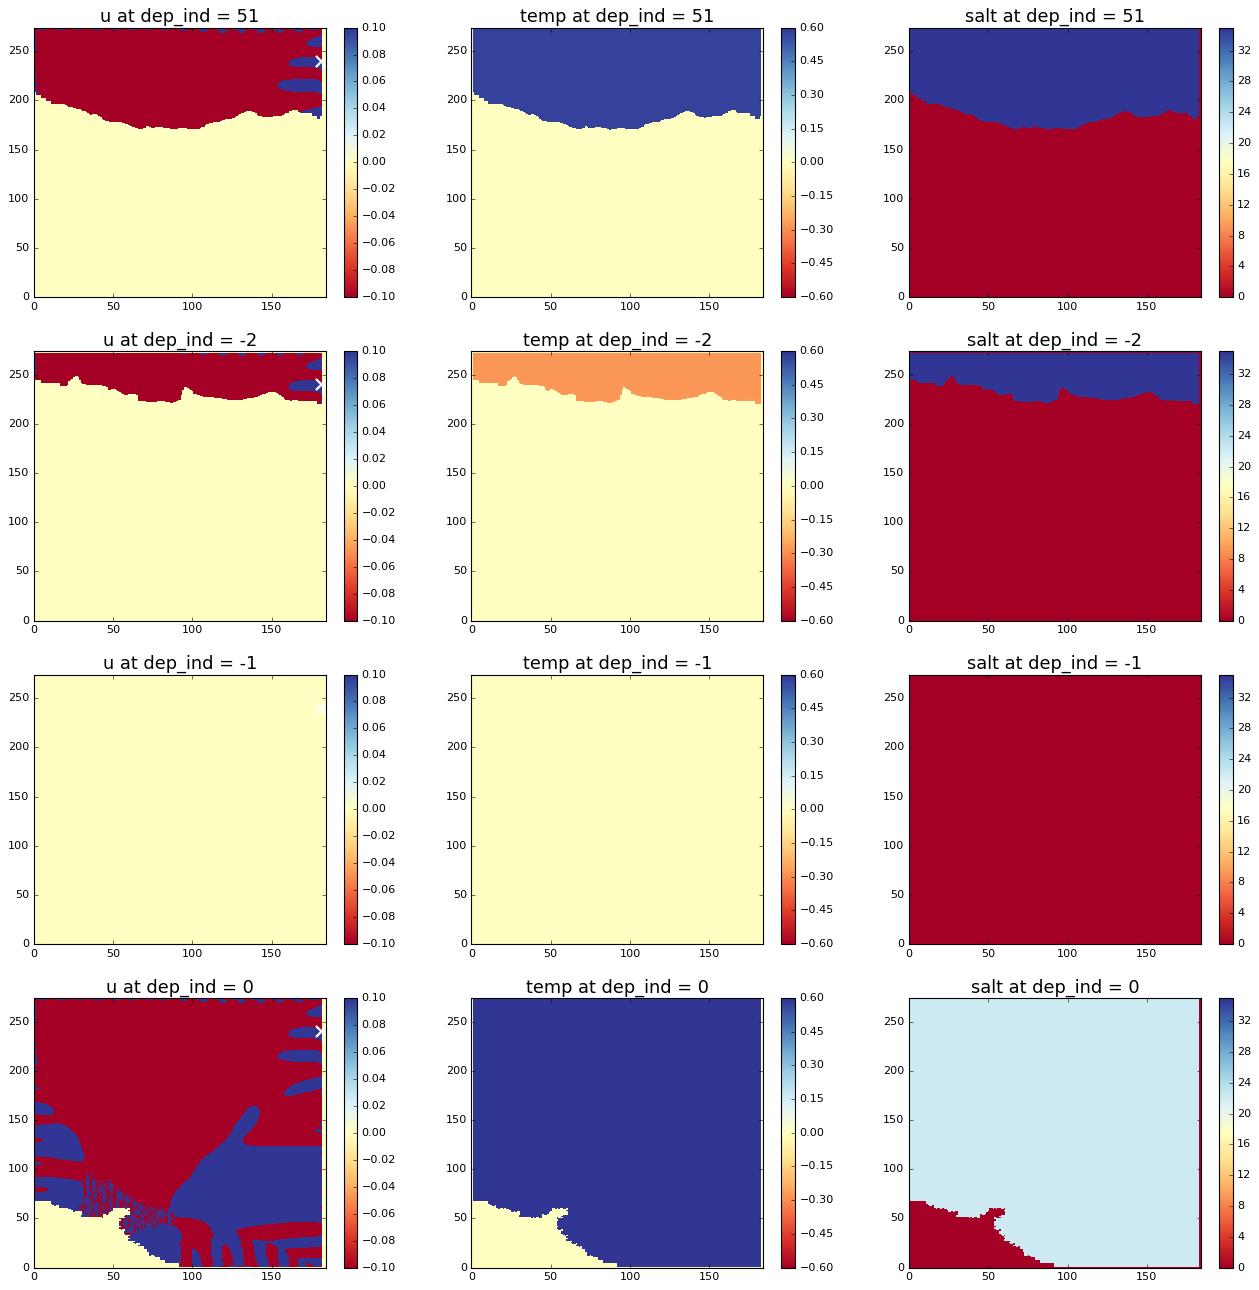

In [75]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(20, 20))
for ax, dep_ind, i in zip([ax1, ax2, ax3, ax4], [51, -2, -1, 0], np.arange(4)):
    for var, title, n in zip([abort_u, abort_t, abort_s], ['u', 'temp', 'salt'], np.arange(3)):
        if title == 'u':
            vmin, vmax = -0.1, 0.1
        if title == 'temp':
            vmin, vmax = -0.6, 0.6
        if title == 'salt':
            vmin, vmax = 0, 35
        var_plot = var[dep_ind, ...]
        p = ax[n].pcolormesh(var_plot, cmap=cm.RdYlBu, vmin=vmin, vmax=vmax)
        fig.colorbar(p, ax=ax[n])
        ax[n].set_title(title + ' at dep_ind = '+ str(dep_ind), fontsize=16)
        ax[n].set_xlim([0, var_plot.shape[-1]]); ax[n].set_ylim([0, var_plot.shape[-2]])
    ax[0].scatter(181, 240, s=100, c='w', marker='x', linewidth=2)

In [53]:
mmp = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-18T234729.518753-0800/mesh_mask.nc')['umask']
mmc = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/mcknz-real-base_2018-01-18T234729.518753-0800/1_mesh_mask.nc')['umask']

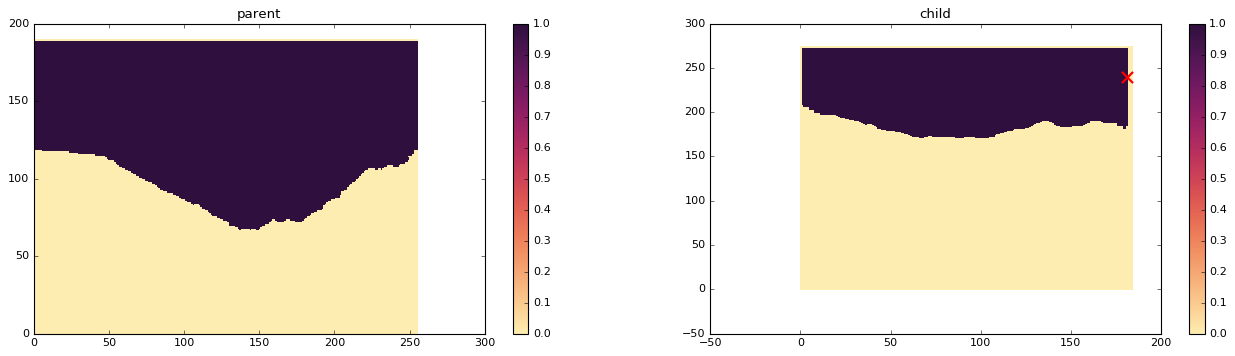

In [72]:
dep_ind = 51
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
p = ax1.pcolormesh(mmp[0, dep_ind, ...], cmap=cmo.cm.matter)
fig.colorbar(p, ax=ax1); ax1.set_title('parent')
p = ax2.pcolormesh(mmc[0, dep_ind, ...], cmap=cmo.cm.matter)
fig.colorbar(p, ax=ax2); ax2.set_title('child')
ax2.scatter(181, 240, s=100, c='r', marker='x', linewidth=2)

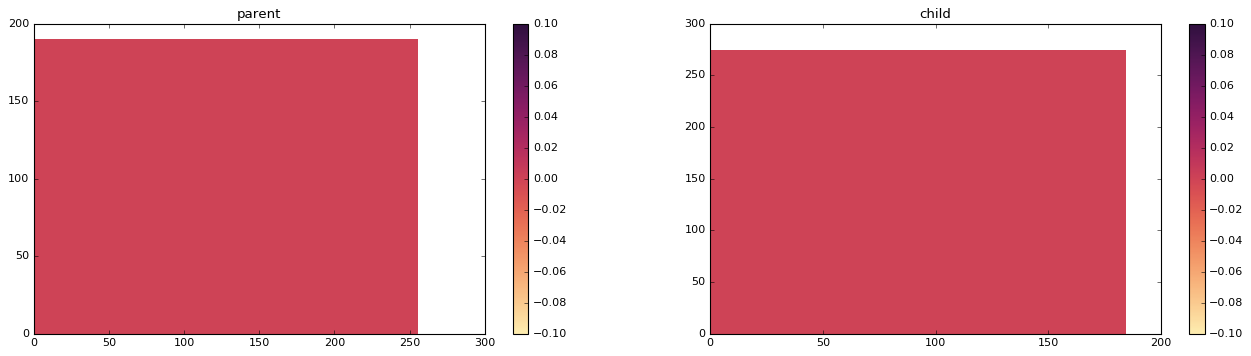

In [50]:
dep_ind = -1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
p = ax1.pcolormesh(mmp[0, dep_ind, ...], cmap=cmo.cm.matter)
fig.colorbar(p, ax=ax1); ax1.set_title('parent')
p = ax2.pcolormesh(mmc[0, dep_ind, ...], cmap=cmo.cm.matter)
fig.colorbar(p, ax=ax2); ax2.set_title('child')

In [51]:
mmp = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_base/1_mesh_mask.nc')['umask']
mmc = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_base/1_mesh_mask.nc')['umask']

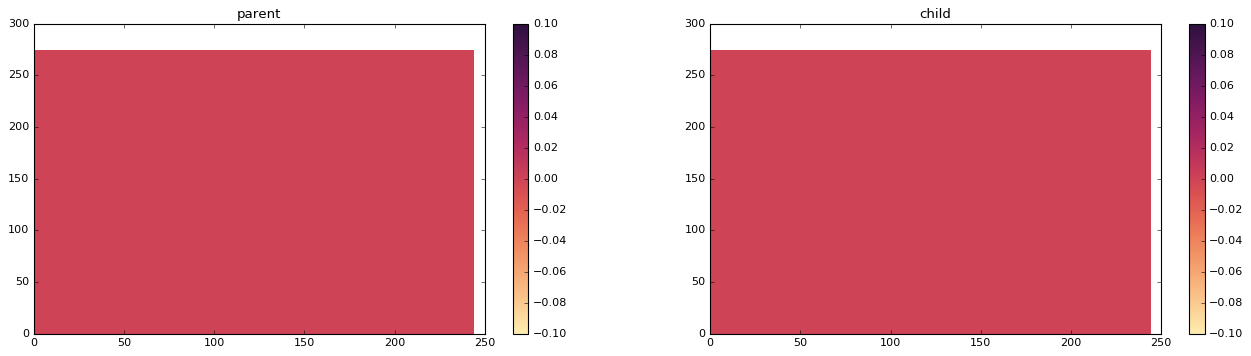

In [52]:
dep_ind = -1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
p = ax1.pcolormesh(mmp[0, dep_ind, ...], cmap=cmo.cm.matter)
fig.colorbar(p, ax=ax1); ax1.set_title('parent')
p = ax2.pcolormesh(mmc[0, dep_ind, ...], cmap=cmo.cm.matter)
fig.colorbar(p, ax=ax2); ax2.set_title('child')